In [1]:
%cd '../HOTS'
from Tools import runjit, netparam, histoscore, histoscore_lagorce, knn
import numpy as np
import matplotlib.pyplot as plt

/home/antoine/homhots/HOTS/HOTS


# On the full dataset

In [2]:
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
R = 2
tau = 5
nbclust = [4,8,16]
filt = 2

timestr = '2021-03-29'
record_path = '../Records/EXP_03_NMNIST/'
dataset = 'nmnist'
nb_train = 60000
nb_test = 10000
ds = 1

nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

training set size: 60000 - testing set: 10000


In [3]:
verbose = True
cumscore = []
cumscore_wei = []
for name in ['homhots']:#, 'homhots']:
    hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R, verbose=verbose)
    trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
    testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
    for k in range(1,100):
        score = knn(trainhistomap,testhistomap, k = k, weights = 'uniform')
        cumscore.append(score)
        print(score)
        score = knn(trainhistomap,testhistomap, k = k, weights = 'distance')
        cumscore_wei.append(score)
        print(score)
    #score = knn(trainhistomap,testhistomap, k = 1)
    #print(score)
    #trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
    #score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)

The dataset used is: nmnist
../Records/EXP_03_NMNIST/models/2021-03-29_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5.0, 50.0, 500.0]_[2, 4, 8]_False.pkl
../Records/EXP_03_NMNIST/train/2021-03-29_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5.0, 50.0, 500.0]_[2, 4, 8]_False_60000_[None, None]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-03-29_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5.0, 50.0, 500.0]_[2, 4, 8]_False_10000_[None, None]_histo.pkl
0.8654
0.8654


KeyboardInterrupt: 

In [ ]:
plt.plot(np.arange(1,100),cumscore)
plt.plot(np.arange(1,100),cumscore_wei)

In [ ]:
for name in ['hots', 'homhots']:
    hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)

verbose=False
JS_score = []
JS_scorehom = []
JS_score_histav = []
JS_scorehom_histav = []
BA_score = []
BA_scorehom = []
BA_score_histav = []
BA_scorehom_histav = []
kNN6_score = []
kNN6_scorehom = []
kNN3_score = []
kNN3_scorehom = []

tauz = [0.01, 0.02, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 5, 10, 20, 30]

for name in ['hots', 'homhots']:
    for tau in tauz:
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
        #hotshom.plotlayer()
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
        
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score.append(score[0])
            JS_score.append(score[4])
            kNN3_score.append(score[5])
            kNN6_score.append(score[6])
        else:
            BA_scorehom.append(score[0])
            JS_scorehom.append(score[4])
            kNN3_scorehom.append(score[5])
            kNN6_scorehom.append(score[6])
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score_histav.append(score[0])
            JS_score_histav.append(score[4])
        else:
            BA_scorehom_histav.append(score[0])
            JS_scorehom_histav.append(score[4])

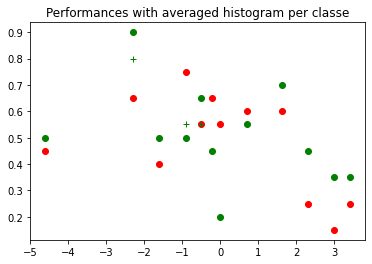

In [7]:
for i in range(len(tauz)):
    j = np.log(tauz[i])
    plt.plot(j,BA_score_histav[i], 'r +')
    plt.plot(j,JS_score_histav[i], 'r o')
    plt.plot(j,BA_scorehom_histav[i], 'g +')
    plt.plot(j,JS_scorehom_histav[i], 'g o')
    plt.title('Performances with averaged histogram per classe')

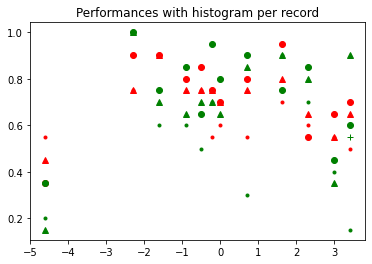

In [8]:
for i in range(len(tauz)):
    j = np.log(tauz[i])
    plt.plot(j,BA_score[i], 'r +')
    plt.plot(j,JS_score[i], 'r o')
    plt.plot(j,kNN3_score[i], 'r ^')
    plt.plot(j,kNN6_score[i], 'r .')
    plt.plot(j,BA_scorehom[i], 'g +')
    plt.plot(j,JS_scorehom[i], 'g o')
    plt.plot(j,kNN3_scorehom[i], 'g ^')
    plt.plot(j,kNN6_scorehom[i], 'g .')
    plt.title('Performances with histogram per record')

# We choose tau = 0.1

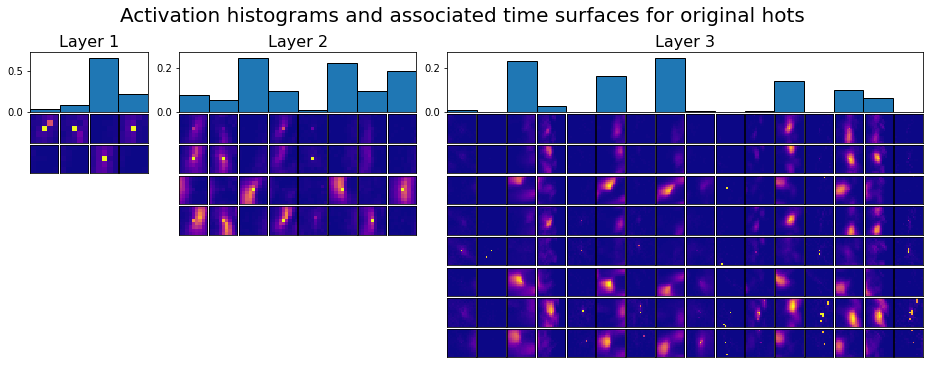

../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_48_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_20_[None, None]_histo.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 90.0% - eucli = 90.0% - norm = 90.0%
Classification scores with entropy: Kullback-Leibler = 85.0% - Jensen-Shannon = 90.0%
Classification scores with k-NN: 3-NN = 75.0% - 6-NN = 75.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_48_[None, None]_histav.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification sco

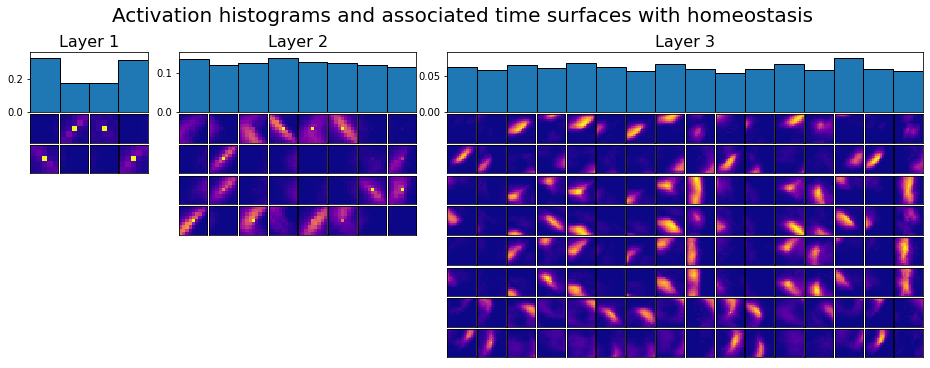

../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False_48_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False_20_[None, None]_histo.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 100.0% - eucli = 100.0% - norm = 100.0%
Classification scores with entropy: Kullback-Leibler = 100.0% - Jensen-Shannon = 100.0%
Classification scores with k-NN: 3-NN = 100.0% - 6-NN = 100.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False_48_[None, None]_histav.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification sc

In [9]:
verbose = True
tau = 0.1
for name in ['hots', 'homhots']:
    hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
    hotshom.plotlayer()
    trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset)
    testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset)
    score = histoscore(trainhistomap,testhistomap, verbose = verbose)
    trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset)
    score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)

In [10]:
verbose=False
JS_score = []
JS_scorehom = []
JS_score_histav = []
JS_scorehom_histav = []
BA_score = []
BA_scorehom = []
BA_score_histav = []
BA_scorehom_histav = []
kNN6_score = []
kNN6_scorehom = []
kNN3_score = []
kNN3_scorehom = []

tau = 0.1

for name in ['hots', 'homhots']:
    for i in range(20):
        timestr = '2021-03-28'+str(i)
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R, verbose=verbose)#, nb_learn=50)
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score.append(score[0])
            JS_score.append(score[4])
            kNN3_score.append(score[5])
            kNN6_score.append(score[6])
        else:
            BA_scorehom.append(score[0])
            JS_scorehom.append(score[4])
            kNN3_scorehom.append(score[5])
            kNN6_scorehom.append(score[6])
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score_histav.append(score[0])
            JS_score_histav.append(score[4])
        else:
            BA_scorehom_histav.append(score[0])
            JS_scorehom_histav.append(score[4])

  0%|          | 0/40 [00:00<?, ?it/s]

no jitter
sensor formatting...


 28%|██▊       | 11/40 [00:04<00:14,  1.96it/s]

KeyboardInterrupt: 

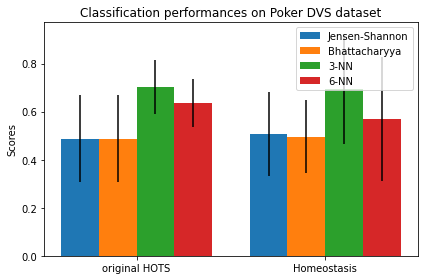

In [17]:
labels = ['original HOTS', 'Homeostasis']
JS_means = [np.mean(JS_score_histav), np.mean(JS_scorehom_histav)]
BA_means = [np.mean(BA_score_histav), np.mean(BA_scorehom_histav)]
kNN3_means = [np.mean(kNN3_score), np.mean(kNN3_scorehom)]
kNN6_means = [np.mean(kNN6_score), np.mean(kNN6_scorehom)]
JS_std = [np.std(JS_score_histav), np.std(JS_scorehom_histav)]
BA_std = [np.std(BA_score_histav), np.std(BA_scorehom_histav)]
kNN3_std = [np.std(kNN3_score), np.std(kNN3_scorehom)]
kNN6_std = [np.std(kNN6_score), np.std(kNN6_scorehom)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3/2*width, JS_means, width, yerr = JS_std, label='Jensen-Shannon')
rects2 = ax.bar(x - width/2, BA_means, width, yerr = BA_std, label='Bhattacharyya')
rects3 = ax.bar(x + width/2, kNN3_means, width, yerr = kNN3_std, label='3-NN')
rects4 = ax.bar(x + 3/2*width, kNN6_means, width, yerr = kNN6_std, label='6-NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification performances on Poker DVS dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()